In [137]:
import numpy as np
from skimage import data, io, filters,util,transform,feature,color,draw
import scipy
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams

gray = plt.get_cmap('gray')
%matplotlib inline

In [11]:
img1 = (io.imread('Images/Q2/colorful3.jpg',dtype='float64')/255.0)
img = color.rgb2gray(img1)

# Q2. 1
### method name: detectCircles(img,radius, useGradient)
This method detects circles in an image using hough transform. 

Major Steps:

1. Converts image to grayscale and performs edge detection (canny)

2. For each edge point in the original image, it then obtains the corresponding points in hough space. detectCircles will obtain points which are centers of potential circles to which the edge point can belong to. 


3. If useGradient is true, then threshold is applied to the canny edge detector. After thresholding, it can be seen that the number of circles decreases. This occurs because of the decrease in the number of edges.

4. The points obtained in the previous step are incremented by 1 in houghSpace. 
For eg: pt (x,y) belonging to a circle has the equation (x-a)^2 + (y-b)^2 = radius^2. All possible circle centers (a,b) in the hough space will be incremented by 1. 

5. Points in the hough space with high values indicate possible circle centers in the original image. skimage.peak_local_max function is then used to obtain local maximas. Using these local maximas as centers, circles are plotted in the original image. 


In [282]:

def detectCircles(img,radius, useGradient,thresh=None,sigma=None):
    grayImg = color.rgb2gray(img)
    m,n = grayImg.shape

    #threshold default set to 0.4. Sigma default set to 2.5
    
    if thresh is None:
        thresh = 0.4
    if sigma is None:
        sigma = 2.5
        
    if not useGradient:
        edgeImg = feature.canny(grayImg, high_threshold = 0.0)#thresh = 0.4;

    else:
        edgeImg = feature.canny(grayImg, high_threshold = thresh, low_threshold=.1*thresh)
      
    houghSpace = np.zeros((m,n));
    edges = np.where(edgeImg==1);
    for i,j in zip(edges[0],edges[1]):
        for k in range(n):
            if (radius**2-(k -j)**2)<0:
                continue
            pt = int(np.sqrt(radius**2-(k-j)**2))
            if(i+pt<m):
                houghSpace[i+pt,k] +=1
            if(i-pt>0):
                houghSpace[i-pt,k] +=1
    
    #maxVal = np.max(houghSpace)
    #centers = np.where(houghSpace >.88*maxVal)
    centers = feature.peak_local_max(houghSpace,min_distance = radius*2)
    #centers = np.array(zip(centers[0],centers[1]))
    return houghSpace,centers
  
#drawing circle on top of the image

def drawCircles(img,centers, radius):
    newImg = np.copy(img)
    for rows,cols in centers:
        rr, cc = draw.circle_perimeter( rows,cols, radius)
        newImg[rr, cc] = (10.0/255.0, 10.0/255.0,10.10/255.0)
    return newImg

#drawing circles with color options
def drawCirclesCol(img,centers, radius,r,g,b):
    newImg = np.copy(img)
    for rows,cols in centers:
        rr, cc = draw.circle_perimeter( rows,cols, radius)
        newImg[rr, cc] = (r/255.0, g/255.0,b/255.0)
    return newImg



### Q2.2  Plotting circles on the images

In [293]:
img1 = (io.imread('Images/Q2/colorful3.jpg',dtype='float64')/255.0)
radius1 = 37
hSpaceImg1_noGrad,centers1 = detectCircles(img1,radius1,False)

img1_withGrad = (io.imread('Images/Q2/colorful3.jpg',dtype='float64')/255.0)
hSpaceImg1_Grad,centers2 = detectCircles(img1_withGrad,radius1,True,thresh=0.6)

img2 = (io.imread('Images/Q2/ladybug.jpg',dtype='float64')/255.0)
radius2 = 40
hSpaceImg2_noGrad,centers_img2 = detectCircles(img2,radius2,False,sigma=2.5)

img2_withGrad = (io.imread('Images/Q2/ladybug.jpg',dtype='float64')/255.0)
hSpaceImg2_Grad,centers2_img2 = detectCircles(img2_withGrad,radius2,True,thresh=0.4)

img3 = (io.imread('Images/Q2/MoonCraters.jpg',dtype='float64')/255.0)
radius3 = 60
hSpaceImg3_noGrad,centers_img3 = detectCircles(img3,radius3,False,sigma=2.5)

img3_withGrad = (io.imread('Images/Q2/MoonCraters.jpg',dtype='float64')/255.0)
hSpaceImg3_Grad,centers2_img3 = detectCircles(img3,radius3,True,thresh=0.6)





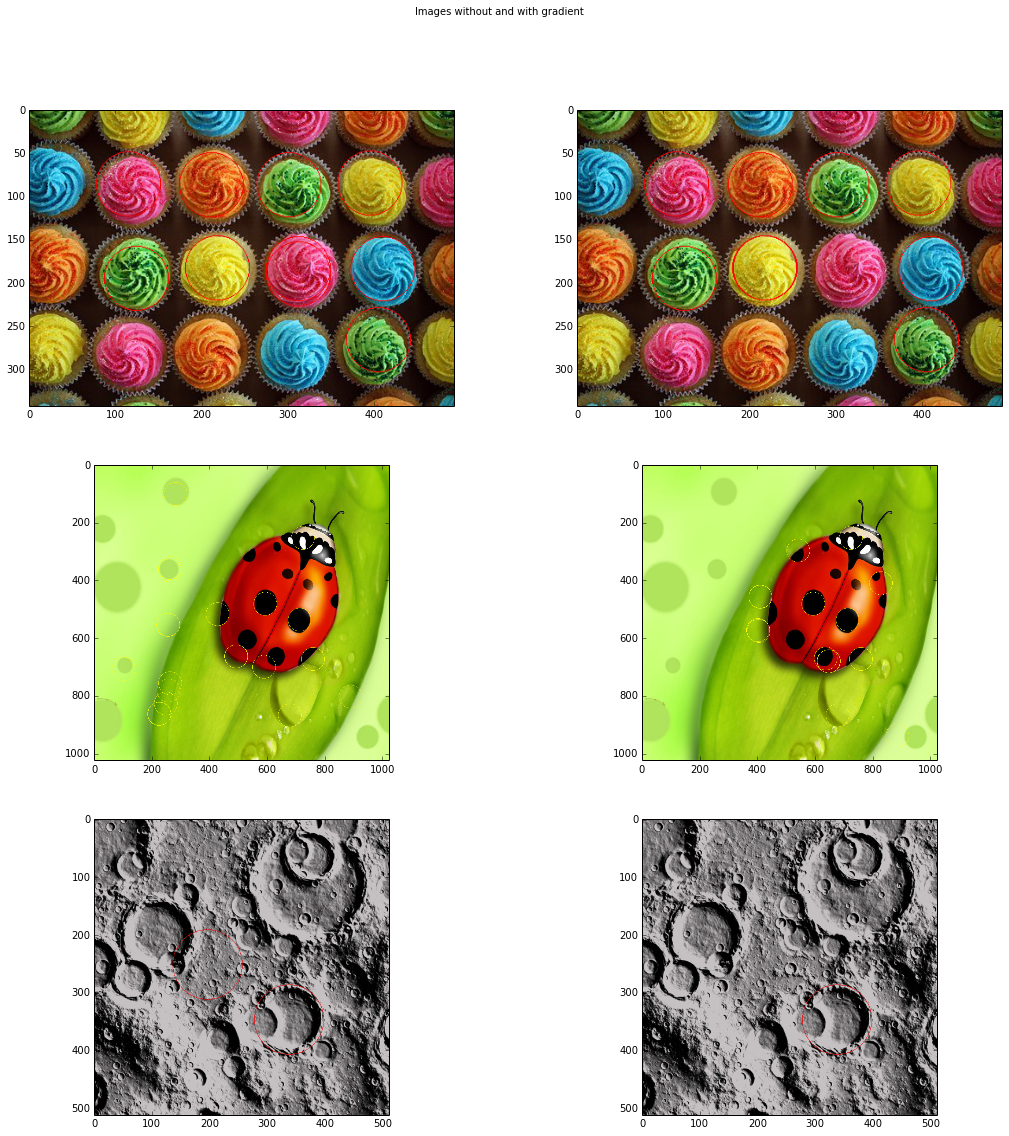

In [297]:
rcParams['figure.figsize'] = 18, 18
r,g,b = 255.0,0.0,0.0
img1 = (io.imread('Images/Q2/colorful3.jpg',dtype='float64')/255.0)
img1NoGrad = drawCirclesCol(img1,centers1,radius1,r,g,b)
img1_withGrad = drawCirclesCol(img1_withGrad,centers2,radius1,r,g,b)
img2NoGrad = drawCirclesCol(img2,centers_img2,radius2,255.0,255.0,0)
img2_withGrad = drawCirclesCol(img2_withGrad,centers2_img2,radius2,255.0,255.0,0)

r,g,b = 230.0,20.0,20.0


img3NoGrad = drawCirclesCol(img3,centers_img3,radius3,r,g,b)
img3_withGrad = drawCirclesCol(img3_withGrad,centers2_img3,radius3,r,g,b)



fig, axes = plt.subplots(nrows=3,ncols=2)
fig.suptitle('Images without and with gradient')
axes[0,0].imshow(img1NoGrad)
axes[0,1].imshow(img1_withGrad)
axes[1,0].imshow(img2NoGrad)
axes[1,1].imshow(img2_withGrad)
axes[2,0].imshow(img3NoGrad)
axes[2,1].imshow(img3_withGrad)

plt.show()

### Q2.3 Using gradients
Advantage: On using the gradient information to choose edges, a number of weak edges and inefficiencies in the edge detection process are removed. Hence, there is lesser noise in hough space and lower number of incorrectly identified circles. This can be seen by comparing the two images of MoonCrater.jpg. The image without gradients has an incorrectly identified circle when compared with the other image.

Disadvantage: Correct circles are sometimes not identified as can be seen in colorful3.jpg's gradient image.

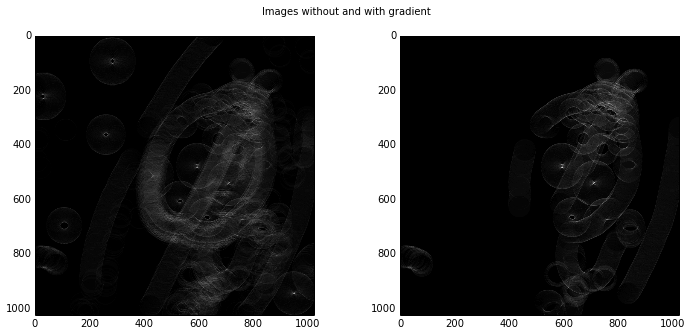

In [304]:
rcParams['figure.figsize'] = 12, 5

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.suptitle('Images without and with gradient')
axes[0].imshow(hSpaceImg2_noGrad,cmap=gray)
axes[1].imshow(hSpaceImg2_Grad,cmap=gray)

plt.show()

### Q2.4 Hough Space image
The above images show the hough space without (left) and with gradient. It can be seen that the images are made up of a number of intersecting circles (which is so because every edge point leads to a number of potential circle centers in the hough space). There are a few comparatively brighter spots in the images as well. The bright spots indicate that the coordinates of those points have a higher probability of being circle centers in the original image. 

### Q2.5 Quantized Hough Space
Major modifications:

1. The hough space is changed to m x quanta, n x quanta where m,n = dims of the image. Variable quanta indicates the amount of quantization
2.  The corresponding points in hough space are changed to (quanta x i +_ quanta x sqrt(radius^2 - ((k/quanta) - j)^2),k) where k is iterated from 1 to quanta*n. 
3. the circle centers are divided by quanta

In [306]:
def detectCirclesQuantized(img,radius, useGradient,thresh=None,sigma=None,quanta = None):
    grayImg = color.rgb2gray(img)
    m,n = grayImg.shape

    if thresh is None:
        thresh = 0.4
    if sigma is None:
        sigma = 2.5
    if quanta is None:
        quanta = 1.0;
    if not useGradient:
        edgeImg = feature.canny(grayImg, high_threshold = 0.0)#thresh = 0.4;

    else:
        edgeImg = feature.canny(grayImg, high_threshold = thresh, low_threshold=.3*thresh)
      
    newM = int(m*quanta)
    newN = int(n*quanta)


    houghSpace = np.zeros((newM,newN));
    edges = np.where(edgeImg==1);
    for i,j in zip(edges[0],edges[1]):
        for k in range(newN):
            if (radius**2-( (float(k)/quanta) -j)**2)<0:
                continue
            pt = int(quanta*np.sqrt(radius**2-((float(k)/quanta)-j)**2))
            iH = int(quanta*i)
            if(iH+pt<newM):
                houghSpace[iH+pt,k] +=1
            if(iH-pt>0):
                houghSpace[iH-pt,k] +=1
    
    #maxVal = np.max(houghSpace)
    #centers = np.where(houghSpace >.88*maxVal)
    centers = np.divide(feature.peak_local_max(houghSpace,min_distance = radius*2),quanta)
    
    centers = centers.astype(int)
    #centers = np.array(zip(centers[0],centers[1]))
    return houghSpace,centers

In [307]:
img2 = (io.imread('Images/Q2/ladybug.jpg',dtype='float64')/255.0)
radius = 40
hSpace_q2,centers_img2_q2 = detectCirclesQuantized(img2,radius,False,sigma=2.5,quanta=0.5)


### Quantization = 0.5 

By changing the bin size to 0.5 times the original, the hough space decreases. Hence, the hough space (lower right) is more densely packed than the original hough space with no quantization. Due to this, there is more noise and the number of local peaks identified is much lesser. The converse is true for quantization greater than 1.


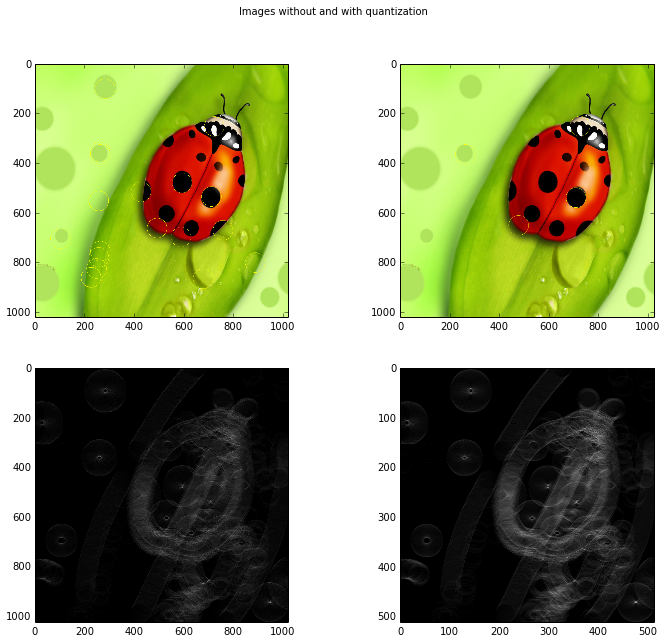

In [312]:
rcParams['figure.figsize'] = 12, 10
r,g,b = 255.0,255.0,0.0
img2_withGrad = (io.imread('Images/Q2/ladybug.jpg',dtype='float64')/255.0)


img2NoGrad = drawCirclesCol(img2,centers_img2,radius,r,g,b)
img2_withGrad = drawCirclesCol(img2,centers_img2_q2,radius,r,g,b)


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.suptitle('Images without and with quantization')
axes[0,0].imshow(img2NoGrad)
axes[0,1].imshow(img2_withGrad)

axes[1,0].imshow(hSpaceImg2_noGrad,cmap=gray)
axes[1,1].imshow(hSpace_q2,cmap=gray)


plt.show()

In [310]:
img2 = (io.imread('Images/Q2/ladybug.jpg',dtype='float64')/255.0)
radius = 40
hSpace_q3,centers_img3_q2 = detectCirclesQuantized(img2,radius,False,sigma=2.5,quanta=2.0)



### Quantization = 2.0

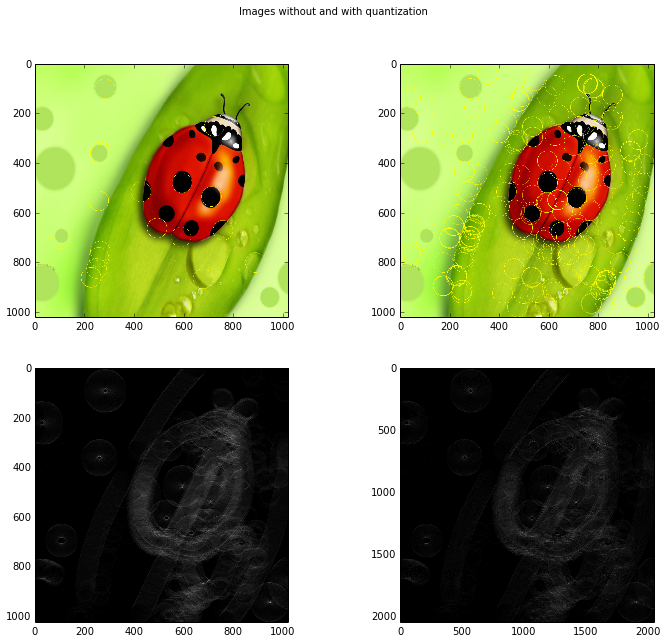

In [313]:
rcParams['figure.figsize'] = 12, 10
r,g,b = 255.0,255.0,0.0
img2_withGrad = (io.imread('Images/Q2/ladybug.jpg',dtype='float64')/255.0)


img2NoGrad2 = drawCirclesCol(img2,centers_img2,radius,r,g,b)
img2_quantized2 = drawCirclesCol(img2,centers_img3_q2,radius,r,g,b)


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.suptitle('Images without and with quantization')
axes[0,0].imshow(img2NoGrad)
axes[0,1].imshow(img2_quantized2)

axes[1,0].imshow(hSpaceImg2_noGrad,cmap=gray)
axes[1,1].imshow(hSpace_q3,cmap=gray)


plt.show()